In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import statsmodels.api as sm


# Классификация отзывов к фильмам.
#### Датасет из keras т.к. было лень искать его так, наверняка должен быть где-нибудь на Кегле

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [18]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 1000)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[8]])
decoded_review

"? just got out and cannot believe what a brilliant documentary this is ? do you ? out of a movie theater in such ? and ? ? movies have become so over ? that the ? of ? something truly special and unique ? happens ? ? did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the ? you might get the feeling that this is one of those ? movies about an amazing ? ? with over the top music and trying to have us ? ? of what a great story it is telling but then not ? us in ? this is not that movie the people tell the story this does such a good job of ? every moment of their ? while we ? their world and feel every second with them there is so much beyond the ? that makes everything they go through so much more ? ? the ? was also a great ? about ? ? and showing the ? in an ? way but this film is much more of a human story i just saw it today but i will go and say that this is one of the best ? i

### Пример одного отзыва. Используем 1000 наиболее частых в употреблении слов. Остальные "?"

In [20]:
def vectorize_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

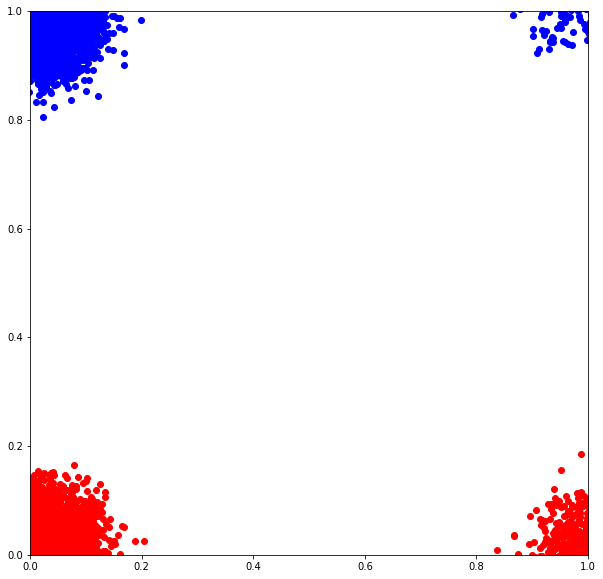

In [21]:
from random import randint
x1 = [x_train[i][527]+np.random.randn()/20 for i in range(x_train.shape[0]) if y_train[i]==0]
y1 = [y_train[i]+np.random.randn()/20 for i in range(x_train.shape[0]) if y_train[i]==0]
x2 = [x_train[i][527]+np.random.randn()/20 for i in range(x_train.shape[0]) if y_train[i]==1]
y2 = [y_train[i]+np.random.randn()/20 for i in range(x_train.shape[0]) if y_train[i]==1]
plt.figure(figsize = (10,10))

plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(x1,y1,color='red')
plt.scatter(x2,y2,color='blue')
plt.show()

In [6]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(x_train, y_train)
logit_predict_y = clf.predict(x_test)
print(clf.get_params(deep = True ))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [7]:
print('точность на тестовой выборке:', np.count_nonzero(y_test-logit_predict_y == 0 )/len(y_test)*100,'%')

точность на тестовой выборке: 85.868 %


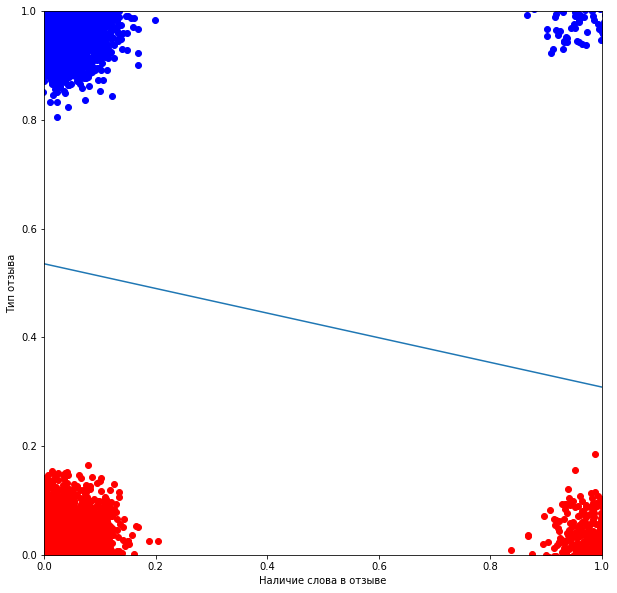

In [22]:
from scipy.special import expit
df = pd.DataFrame({'x': [x[527] for x in x_test], 'y': y_test})
df = df.sort_values(by='x')

plt.figure(figsize = (10,10))
sigmoid_function = expit(df['x'] * clf.coef_[0][527] + clf.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Наличие слова в отзыве')
plt.ylabel('Тип отзыва')
plt.scatter(x1,y1,color='red')
plt.scatter(x2,y2,color='blue')
plt.show()
#plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='b')

In [9]:
from statsmodels.discrete.discrete_model import Probit
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [10]:
model = Probit(y_train, x_train)
probit_model = model.fit(method = 'bfgs')
print(probit_model.summary2())

         Current function value: 0.295216
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                         Results: Probit
Model:              Probit           Pseudo R-squared: 0.574     
Dependent Variable: y                AIC:              16756.8114
Date:               2019-11-30 21:22 BIC:              24867.1892
No. Observations:   25000            Log-Likelihood:   -7380.4   
Df Model:           997              LL-Null:          -17329.   
Df Residuals:       24002            LLR p-value:      0.0000    
Converged:          0.0000           Scale:            1.0000    
--------------------------------------------------------------------
              Coef.     Std.Err.     z     P>|z|    [0.025    0.975]
--------------------------------------------------------------------
const         0.0000         nan    nan      nan       nan       nan
x1            0.1017         nan    nan      nan       nan       nan
x2            0.1109         nan    nan      nan       nan       nan
x3            0.0000         nan    nan      nan       nan       nan
x4            

In [11]:
from sklearn.metrics import accuracy_score
probit_test_result = probit_model.predict(x_test)
print('точность на тестовой выборке:',accuracy_score(y_test, probit_test_result>0.574)*100,'%')

точность на тестовой выборке: 85.72800000000001 %


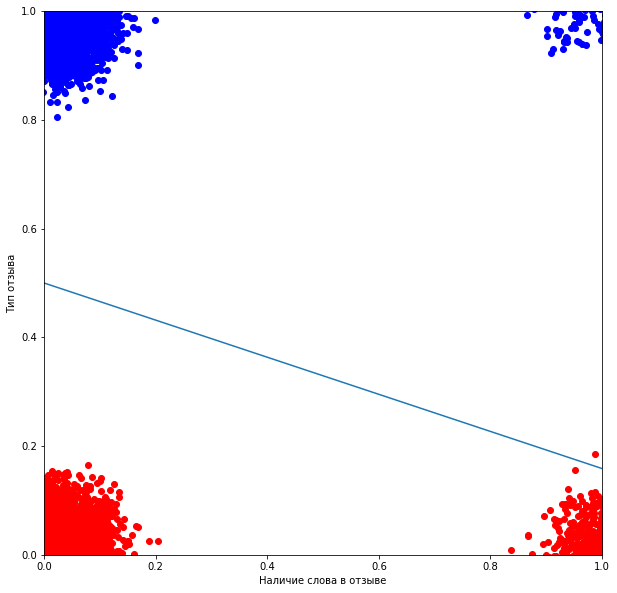

In [23]:
plt.figure(figsize=(10,10))
plt.plot(df['x'],1-probit_model.model.cdf(df['x']))

plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(x1,y1,color='red')
plt.scatter(x2,y2,color='blue')

plt.xlabel('Наличие слова в отзыве')
plt.ylabel('Тип отзыва')
plt.show()

### Защита от переобучения

In [13]:
batch = 256
split_index = np.arange(0,x_test.shape[0],256)
params = np.array([])
for i in np.arange(split_index.size-1):
    logit_model_i = sm.Logit(y_train[split_index[i]:split_index[i+1]], x_train[split_index[i]:split_index[i+1]])
    logit_model_i_fit = logit_model_i.fit(method = 'bfgs')
    np.append(params,logit_model_i_fit.params)

Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000016
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 28
         Function evaluations: 30
         Gradient evaluations: 30


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000018
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000015
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000023
         Iterations: 19
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000022
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 24
         Function evaluations: 26
         Gradient evaluations: 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 21
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000009
         Iterations: 22
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000012
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 21
         Function evaluations: 24
         Gradient evaluations: 24


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000017
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000007
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [14]:
logit_model_i_fit.params = params.mean(axis=0) # averaging
print(logit_model_i_fit.summary())
logit_model_i_fit_pred = logit_model_i_fit.predict(x_test)
logit_test_accuracy_av = 100*accuracy_score(y_test, logit_model_i_fit_pred>0.574)
print("Accuracy on test data  = " + format(logit_test_accuracy_av, '.2f') + "%")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  256
Model:                          Logit   Df Residuals:                        0
Method:                           MLE   Df Model:                          255
Date:                Sat, 30 Nov 2019   Pseudo R-squ.:                   1.000
Time:                        21:28:27   Log-Likelihood:             -0.0020451
converged:                       True   LL-Null:                       -177.25
Covariance Type:            nonrobust   LLR p-value:                 3.678e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0        nan        nan        nan         nan         nan
x1             0.0808        nan        nan        nan         nan         nan
x2             0.0808        nan        nan        n

In [15]:
logit_test_accuracy_av = 100*accuracy_score(y_test, logit_model_i_fit_pred>0.574)
print("Accuracy on test data  = " + format(logit_test_accuracy_av, '.2f') + "%")

Accuracy on test data  = 74.29%
